In [54]:
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [82]:
df_budgets = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')
df_gross = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
df_movies = pd.read_csv('../zippedData/tmdb.movies.csv.gz', index_col=0)

AttributeError: module 'seaborn' has no attribute 'set_theme'

What are the highest grossing movies of all time?

In [85]:
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09


In [91]:
df_budgets.release_date=pd.to_datetime(df_budgets.release_date)

In [101]:
# Convert worldwide gross to float
# Convert production budget to float
df_budgets.worldwide_gross=df_budgets.worldwide_gross.str.replace("$", "").str.replace(",",'').astype(float)
df_budgets.production_budget=df_budgets.production_budget.str.replace("$", "").str.replace(",",'').astype(float)
df_budgets.domestic_gross=df_budgets.domestic_gross.str.replace("$", "").str.replace(",",'').astype(float)

# Create a years column to hhelp parse the data

In [112]:
df_budgets['year']=df_budgets['release_date'].dt.strftime("%Y").astype(int)

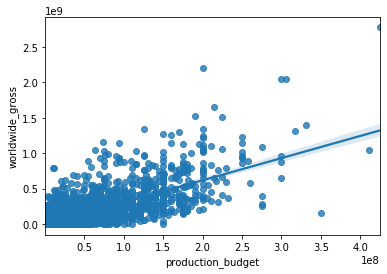

In [104]:
sns.regplot(x='production_budget', y="worldwide_gross", data=df_budgets);

In [113]:
df_budgets.corr()

,id,production_budget,domestic_gross,worldwide_gross,year
id,1.000000,-0.035278,0.008255,-0.009422,-0.011652
production_budget,-0.035278,1.000000,0.685682,0.748306,0.176091
domestic_gross,0.008255,0.685682,1.000000,0.938853,0.036690
worldwide_gross,-0.009422,0.748306,0.938853,1.000000,0.100588
year,-0.011652,0.176091,0.036690,0.100588,1.000000


### A note on the correlations in the budget

It seems that the amount of money spent on the movie has a moderately strong positve correlation on both the domestic and worldwide gross profit of the movie. However, what kind of factors determine which movies are the most successful? 

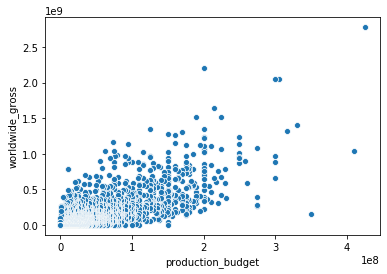

In [96]:
x=df_budgets.production_budget
y=df_budgets.worldwide_gross
scatter = sns.scatterplot(x=x,y=y)


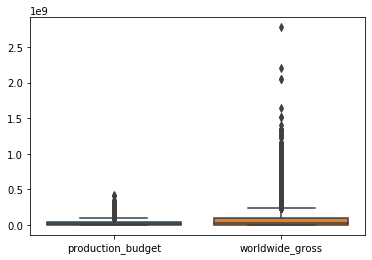

In [78]:
boxplot = sns.boxplot(data=df_budgets[['production_budget', 'worldwide_gross']])
## Too many outliers, very difficult to draw conclusions.

Let's narrow our search down a little bit to movies made in the last 15 years. We will compare the correlations of that group to the toal group to see if they are signeficantly different.

In [116]:
df_budgets[df_budgets.year > 2000].corr()

,id,production_budget,domestic_gross,worldwide_gross,year
id,1.000000,-0.040464,-0.002765,-0.017403,0.016971
production_budget,-0.040464,1.000000,0.731389,0.780407,0.062208
domestic_gross,-0.002765,0.731389,1.000000,0.942976,0.045176
worldwide_gross,-0.017403,0.780407,0.942976,1.000000,0.093932
year,0.016971,0.062208,0.045176,0.093932,1.000000


So it seems that in recent years, there is even less of an effect of year on total gross. So what other factors could be at play? Let's plot a graph of year vs gross.

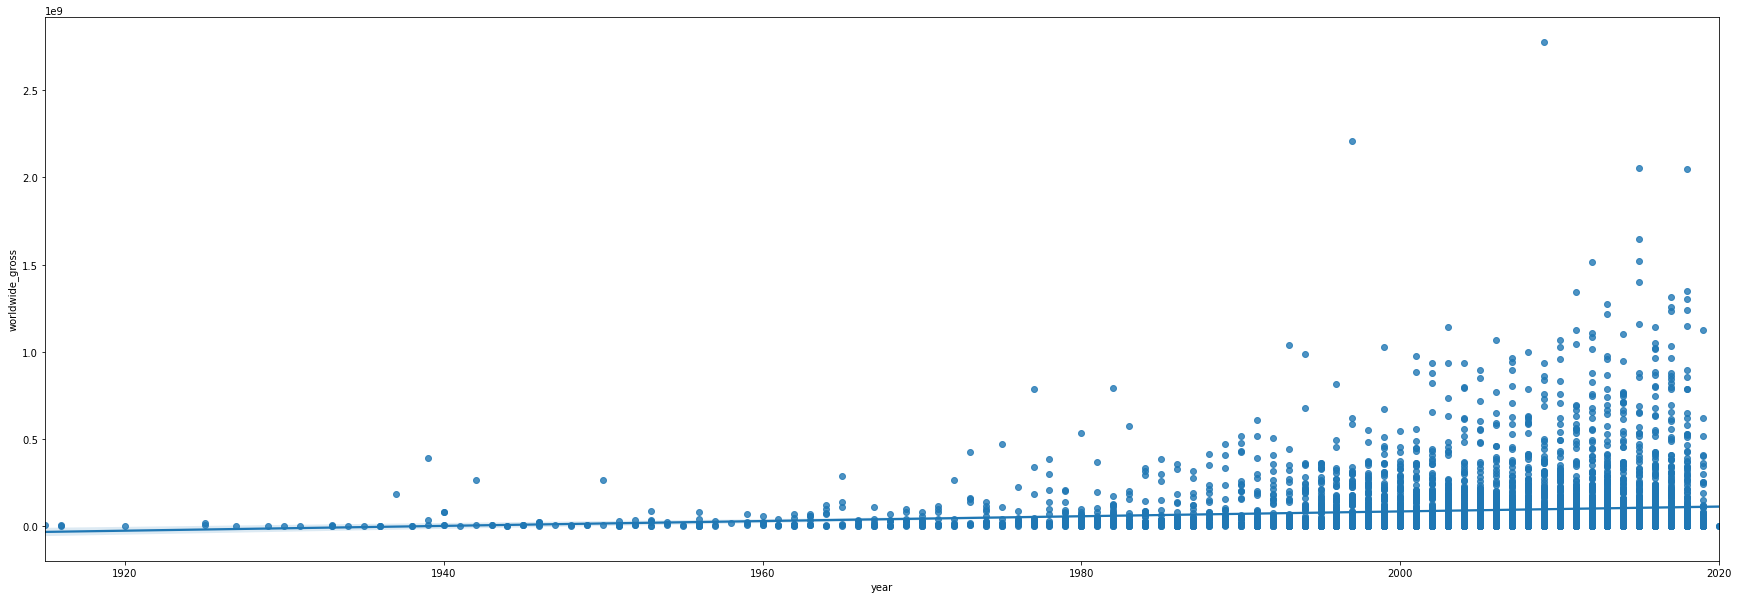

In [127]:
x = df_budgets.year
y = df_budgets.worldwide_gross
# scatter_year_vs_gross = sns.scatterplot(x=x,y=y)
dims = (30,10)
fig, ax = plt.subplots(figsize=dims)
sns.regplot(ax=ax, x=x, y=y, data=df_budgets,fit_reg=True);

It seems so strange tha the correlation isn't more positive. Let's take a look at the descriptive statistics for this data set

In [131]:
df_budgets.describe()
print(df_budgets.worldwide_gross.median()-df_budgets.worldwide_gross.mean())

-63503012.40643376


Woah. There are some serious outliers effecting our data set. How should we handle them? I mea, I don't think that microsoft is looking to make the next avatar. If they are they should get james cameron and a bunch of a list celebreties that have won oscars. If they are simply looking to turn a profit, probably they aren't interested in investing several hundred million.

Let's groupby the year and plot the data as a line graph and see how the cost changes over time.

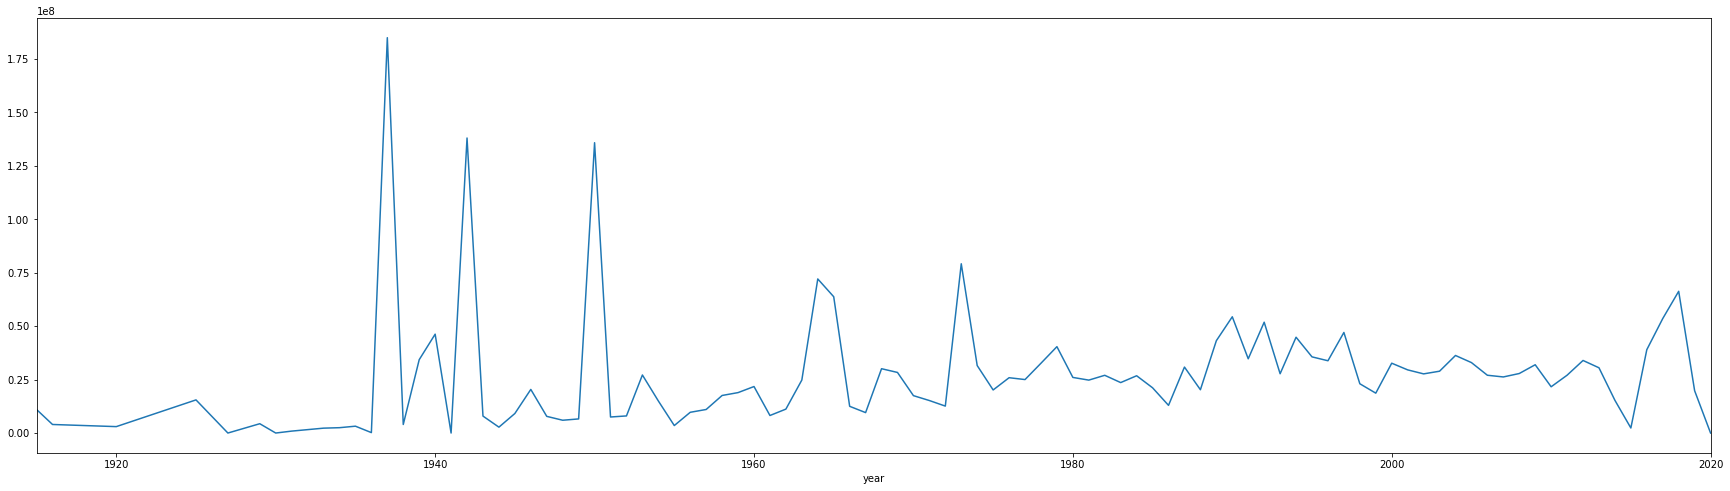

In [144]:
df_budgets.groupby(['year']).worldwide_gross.median().plot(kind='line', figsize=(30,8))

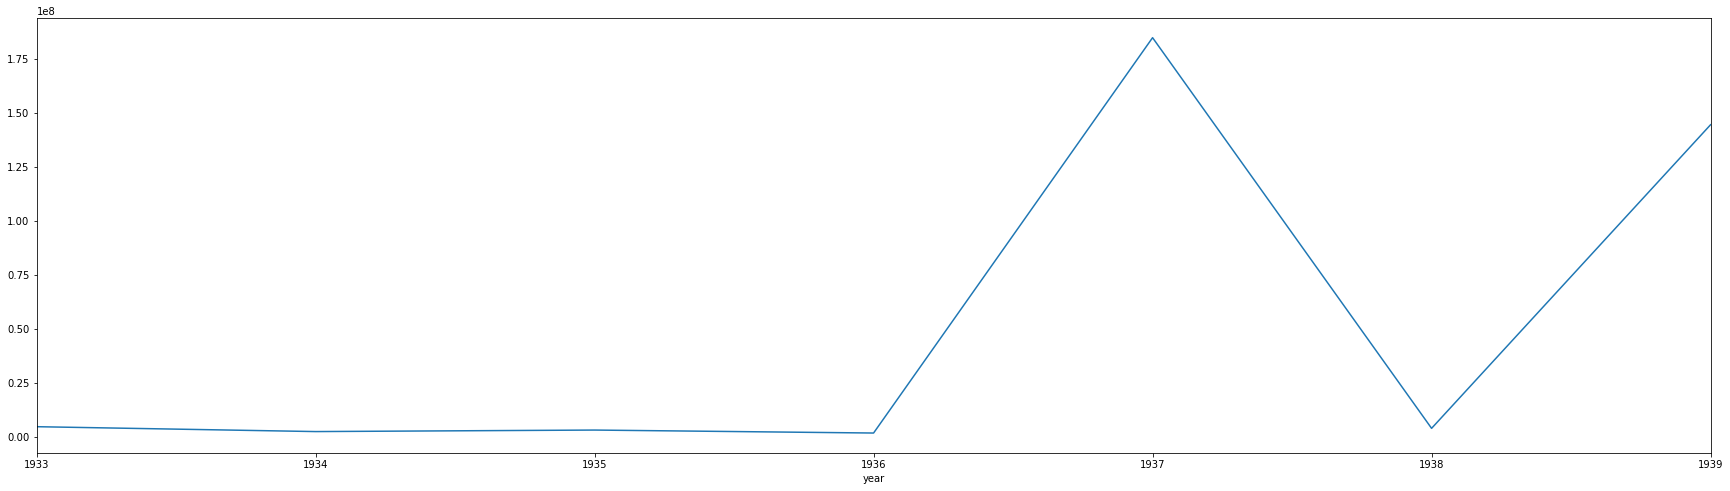

In [143]:
df_budgets[(df_budgets.year > 1932)& (df_budgets.year < 1940)].groupby(['year']).worldwide_gross.mean().plot(kind='line', figsize=(30,8))

It seems like 1937 is a strange year for movies. Lets look at the data for that year. Woah! Snow white and the 7 dwarfs is out of control. 

Lets step along and find other outliers. BOOM bambi!! 1942. No wonder Disney cornered the goddamn market.

In [149]:
df_budgets[df_budgets.year == 1954].sort_values('worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
5336,37,1954-07-28,On the Waterfront,910000.0,9600000.0,9600000.0,1954
4298,99,1954-08-24,The Egyptian,5000000.0,15000000.0,15000000.0,1954
4270,71,1954-12-23,"20,000 Leagues Under the Sea",5000000.0,28200000.0,28200000.0,1954


I think for the sake of our inquery, we shouldn't be looking at movies before they begin sto stabilise out. We could do this objectively by fitting a curve to the number of movies produced per year, but lets just graph a per year eye ball and have a look at the results. 

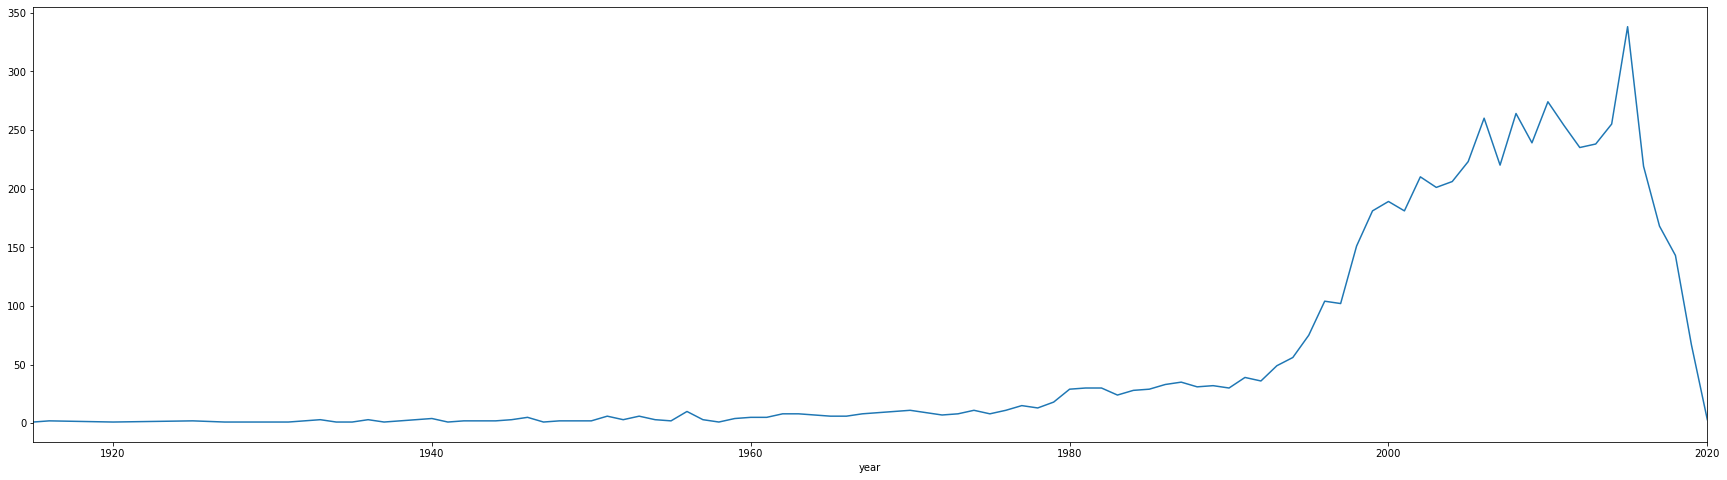

In [151]:
df_budgets.groupby(['year']).worldwide_gross.count().plot(kind='line', figsize=(30,8));

I think we shouldn't necessarily include anything before 1990 in our analysis. Their simply wasn't enough movies being produced to compare it to the current market. Arguably you can't compare anything to the current market as it is forever changed by covid.



In [57]:
df_gross_movies = df_gross.merge(df_movies, how='outer', left_on='title', right_on='title')

In [61]:
df_gross_movies[df_gross_movies.title.str.contains("Avatar")]

,title,studio,domestic_gross,foreign_gross,year,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
133,Avatar: Special Edition,Fox,10700000.0,22500000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3793,Avatar,NaN,NaN,NaN,NaN,"[28, 12, 14, 878]",19995.0,en,Avatar,26.526,2009-12-18,7.4,18676.0
5489,Avatar Spirits,NaN,NaN,NaN,NaN,[],278698.0,en,Avatar Spirits,0.600,2010-06-22,9.5,2.0
6814,Aliens vs. Avatars,NaN,NaN,NaN,NaN,"[878, 27, 53]",79582.0,en,Aliens vs. Avatars,2.199,2011-09-20,2.4,12.0
24803,Avatar Flight of Passage,NaN,NaN,NaN,NaN,"[12, 10751]",460441.0,en,Avatar Flight of Passage,0.600,2017-05-01,10.0,1.0


In [11]:
df_gross_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2703 entries, 0 to 2702
Data columns (total 13 columns):
title                2703 non-null object
studio               2702 non-null object
domestic_gross       2682 non-null float64
foreign_gross        1723 non-null object
year                 2703 non-null int64
genre_ids            2703 non-null object
id                   2703 non-null int64
original_language    2703 non-null object
original_title       2703 non-null object
popularity           2703 non-null float64
release_date         2703 non-null object
vote_average         2703 non-null float64
vote_count           2703 non-null int64
dtypes: float64(3), int64(3), object(7)
memory usage: 295.6+ KB


So we have a table where we have 3 thousand movies with their associated studio and profit. Now I want to do a left join with all of the these values and try and 'tack on' the budgets for each film

In [19]:
df_gross_budgets = df_gross_movies.merge(df_budgets, how='inner', left_on='title', right_on="movie")

In [20]:
df_gross_budgets.head()

,title,studio,domestic_gross_x,foreign_gross,year,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"


In [26]:
to_drop = ['domestic_gross_y',
           'worldwide_gross', 
           'release_date_y',
           'original_title', 
           'release_date_y', 
           'original_language', 
           'movie', 
           'year',
           'id_x',
           'id_y'
          ]
df = df_gross_budgets.drop(columns=to_drop)

In [52]:
df[df.vote_count > 100].sort_values('vote_average', ascending=False)

,title,studio,domestic_gross_x,foreign_gross,genre_ids,popularity,release_date_x,vote_average,vote_count,production_budget
718,Whiplash,SPC,13100000.0,35900000,"[18, 10402]",28.784,2014-10-10,8.4,7908,"$3,300,000"
1292,Avengers: Infinity War,BV,678800000.0,"1,369.5","[12, 28, 14]",80.773,2018-04-27,8.3,13948,"$300,000,000"
1311,Green Book,Uni.,85100000.0,234700000,"[18, 35]",36.284,2018-11-16,8.3,3499,"$23,000,000"
1,Inception,WB,292600000.0,535700000,"[28, 878, 12]",27.920,2010-07-16,8.3,22186,"$160,000,000"
754,Mommy,RAtt.,3500000.0,NaN,[18],11.095,2014-08-29,8.3,1399,"$4,900,000"
...,...,...,...,...,...,...,...,...,...,...
463,The Apparition,WB,4900000.0,4700000,"[27, 53]",7.714,2012-08-24,4.3,221,"$17,000,000"
1104,Norm of the North,LGF,17100000.0,NaN,"[12, 16, 35, 10751]",9.325,2016-01-15,4.2,192,"$18,000,000"
212,Jack and Jill,Sony,74200000.0,75500000,[35],11.277,2011-11-11,4.1,1124,"$79,000,000"
68,Vampires Suck,Fox,36700000.0,43900000,"[35, 27]",8.992,2010-08-18,4.1,658,"$20,000,000"


In [42]:
df.title.str.contains('Avatar').value_counts()

False    1395
Name: title, dtype: int64

In [49]:
len(df.studio)

1395